Exercise 2
Pleased with your performance with the digits recognition task, your boss decides to challenge you with a harder task. Their online branch allows people to upload images to a website that generates and prints a postcard that is shipped to destination. Your boss would like to know what images people are loading on the site in order to provide targeted advertising on the same page, so he asks you to build an image recognition system capable of recognizing a few objects. Luckily for you, there's a dataset ready made with a collection of labeled images. This is the Cifar 10 Dataset, a very famous dataset that contains images for 10 different categories:
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
In this exercise we will reach the limit of what you can achieve on your laptop and get ready for the next session on cloud GPUs.
Here's what you have to do:
load the cifar10 dataset using keras.datasets.cifar10.load_data()
display a few images, see how hard/easy it is for you to recognize an object with such low resolution
check the shape of X_train, does it need reshape?
check the scale of X_train, does it need rescaling?
check the shape of y_train, does it need reshape?
build a model with the following architecture, and choose the parameters and activation functions for each of the layers:
conv2d
conv2d
maxpool
conv2d
conv2d
maxpool
flatten
dense
output
compile the model and check the number of parameters
attempt to train the model with the optimizer of your choice. How fast does training proceed?
If training is too slow (as expected) stop the execution and move to the next session!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K


Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

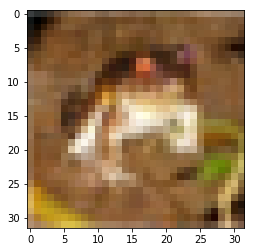

In [13]:
plt.imshow(X_train[0])

In [14]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [15]:
y_train_cat.shape

(50000, 10)

In [17]:
y_test.shape

(10000, 1)

In [16]:
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [28]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(64,(3, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64,(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [31]:
h = model.fit(X_train, y_train_cat, batch_size=128,
          epochs=10, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 263s - loss: 1.7969 - acc: 0.3515 - val_loss: 1.5223 - val_acc: 0.4602
Epoch 2/10
40000/40000 [==============================] - 259s - loss: 1.3851 - acc: 0.5075 - val_loss: 1.2574 - val_acc: 0.5705
Epoch 3/10
40000/40000 [==============================] - 258s - loss: 1.1630 - acc: 0.5943 - val_loss: 1.3270 - val_acc: 0.5400
Epoch 4/10
40000/40000 [==============================] - 257s - loss: 1.0218 - acc: 0.6434 - val_loss: 1.0038 - val_acc: 0.6551
Epoch 5/10
40000/40000 [==============================] - 257s - loss: 0.8966 - acc: 0.6902 - val_loss: 0.9528 - val_acc: 0.6785
Epoch 6/10
40000/40000 [==============================] - 257s - loss: 0.8038 - acc: 0.7227 - val_loss: 0.9568 - val_acc: 0.6774
Epoch 7/10
40000/40000 [==============================] - 257s - loss: 0.7210 - acc: 0.7493 - val_loss: 0.8946 - val_acc: 0.7087
Epoch 8/10
40000/40000 [=======================

In [32]:
test_acc = model.evaluate(X_test, y_test_cat)

 9984/10000 [============================>.] - ETA: 0s

In [ ]:
test_

In [ ]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')